### 10. 서울시 중랑구 신내동 치킨 외식업체 리뷰 데이터 분석

In [1]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_sn_raw = pd.read_csv('./data/신내동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_sn = df_sn_raw

# 리뷰가 없는 결측치 제거
df_sn = df_sn.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_sn['review'] = df_sn['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_sn['likes'] = df_sn['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_sn_like = df_sn[df_sn['likes'] == 1]
df_sn_dislike = df_sn[df_sn['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
sn_like_reviews = "".join(df_sn_like['review'].tolist())
sn_dislike_reviews = "".join(df_sn_dislike['review'].tolist())

### 신내동 긍정 리뷰 워드클라우드

상위 20개 키워드 순위
[('치킨', 26), ('사장', 15), ('맛', 12), ('매장', 8), ('닭', 8), ('주문', 7), ('최고', 7), ('후라이드', 7), ('서비스', 6), ('정말', 6), ('단골', 6), ('배달', 6), ('포장', 6), ('자주', 5), ('중', 5), ('치즈볼', 5), ('진짜', 5), ('가격', 5), ('곳', 5), ('집', 5)]


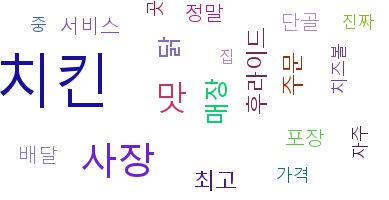

In [4]:
# 신내동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sn_like_reviews = nouns_classify.nouns(sn_like_reviews)
count_sn_like_reviews = Counter(nouns_sn_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_sn_like_reviews = Counter({x : count_sn_like_reviews[x] for x in count_sn_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sn_like = count_sn_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sn_like = pytagcloud.make_tags(tag_rank_sn_like, maxsize = 50)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sn_like, './data/신내동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sn_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/신내동_긍정리뷰_wordcloud.jpg')


### 신내동 부정 리뷰 워드클라우드

상위 20개 키워드 순위
[('주문', 29), ('맛', 17), ('배달', 16), ('치킨', 14), ('전화', 11), ('장사', 10), ('닭', 10), ('말', 8), ('양념', 8), ('점', 8), ('그냥', 7), ('분', 7), ('하나', 7), ('사장', 7), ('포장', 7), ('매장', 7), ('쿠폰', 6), ('기분', 6), ('내', 5), ('진짜', 5)]


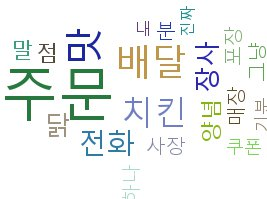

In [5]:
# 신내동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sn_dislike_reviews = nouns_classify.nouns(sn_dislike_reviews)
count_sn_dislike_reviews = Counter(nouns_sn_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_sn_dislike_reviews = Counter({x : count_sn_dislike_reviews[x] for x in count_sn_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sn_dislike = count_sn_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sn_dislike = pytagcloud.make_tags(tag_rank_sn_dislike, maxsize = 50)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sn_dislike, './data/신내동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sn_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/신내동_부정리뷰_wordcloud.jpg')
